# Programación Genética para el Recorrido de un Robot de Entrega de Galletas

**Francisco Josse Rojas Rojas**

**Yeira Liseth Rodriguez Rodriguez**

## 1. Introducción y Problema a Resolver

Este script implementa una solución al problema del "Robot Repartidor de Galletas" utilizando la **Programación Genética (PG)**. El objetivo es que un robot aprenda, de forma autónoma, el recorrido óptimo para entregar galletas a un grupo de ingenieros distribuidos aleatoriamente en una sala cuadrada. La optimización se basa en maximizar la cantidad de galletas entregadas y minimizar la distancia total recorrida por el robot.

La Programación Genética es una rama de la inteligencia artificial que utiliza los principios de la evolución biológica para desarrollar programas de computadora que resuelvan tareas específicas. En este caso, los "programas" son secuencias de acciones que el robot puede ejecutar.

## 2. Componentes de la Programación Genética

Para aplicar la PG, se han definido los siguientes elementos fundamentales:

### 2.1. Conjunto de Terminales (T)

Los terminales representan las "entradas" o "variables" más básicas que el robot puede usar en sus programas. Son los elementos más elementales y no pueden descomponerse más. En este contexto, incluyen:

* **IDs de Ingeniero:** Identificadores numéricos (0 a `NUM_ENGINEERS - 1`) que representan a cada ingeniero.
* **Valores de Paso:** Constantes numéricas aleatorias (enteros o flotantes) que definen la magnitud de los movimientos en los ejes X e Y.

### 2.2. Conjunto de Funciones (F)

Las funciones son las "operaciones" o "instrucciones" que el robot puede ejecutar para interactuar con su entorno y cumplir su tarea. Estas funciones pueden tomar terminales (o los resultados de otras funciones) como argumentos.

* `move_x(steps)`: Mueve el robot `steps` unidades en el eje horizontal (X).
* `move_y(steps)`: Mueve el robot `steps` unidades en el eje vertical (Y).
* `go_to_engineer(engineer_id)`: Mueve el robot directamente a la posición del ingeniero especificado.
* `deliver_cookie(engineer_id)`: Simula la entrega de una galleta al ingeniero especificado. **Es importante destacar que, para una simulación realista, esta función se ha modificado para que el robot se mueva automáticamente a la posición del ingeniero antes de entregar la galleta, incurriendo así en el costo de distancia.**

### 2.3. Función de Aptitud (Fitness Function)

La función de aptitud (`evaluate_program`) es el corazón de la PG. Es la métrica que determina qué tan "bueno" es un programa generado. El algoritmo genético busca programas que maximicen esta función.

La aptitud se calcula de la siguiente manera:

* **Puntos Positivos:**
    * `POINTS_PER_COOKIE`: Se otorgan puntos fijos por cada galleta entregada exitosamente a un ingeniero.
* **Penalizaciones (Puntos Negativos):**
    * `DIST_PENALTY_FACTOR`: Se resta un valor proporcional a la distancia total que el robot recorrió para entregar las galletas. Esto fomenta rutas eficientes y cortas.
    * `NO_COOKIE_PENALTY`: Se resta una penalización por cada ingeniero al que no se le entregó una galleta al finalizar el programa. Esto incentiva que el robot visite a todos los ingenieros.

La fórmula general de la aptitud es:
`Aptitud = (Número de galletas entregadas * PUNTOS_POR_GALLETA) - (Distancia total recorrida * PENALIZACIÓN_DISTANCIA) - (Galletas no entregadas * PENALIZACIÓN_NO_ENTREGA)`

## 3. Estructura y Funcionamiento del Código

El script está estructurado en varias secciones lógicas:

### 3.1. Configuración del Entorno y Parámetros

Define constantes como el tamaño de la sala (`ROOM_SIZE`), el número de ingenieros (`NUM_ENGINEERS`), la posición inicial del robot (`ROBOT_START_POS`), y los parámetros del algoritmo genético (tamaño de la población, número de generaciones, probabilidades de cruce y mutación).

### 3.2. Clase `RobotState`

Esta clase simula el estado interno del robot durante la ejecución de un programa. Mantiene:

* La posición actual del robot (`robot_x`, `robot_y`).
* Las coordenadas de todos los ingenieros.
* Un registro booleano de galletas entregadas para cada ingeniero.
* La distancia total recorrida.
* **`path_history`**: Un historial de todas las posiciones por las que el robot se ha movido. Esto es fundamental para la visualización de la trayectoria.

### 3.3. Funciones Primitivas del Robot

Implementa las funciones definidas en el "Conjunto de Funciones (F)" que el robot puede ejecutar. Estas funciones modifican el estado del robot (`RobotState`).

### 3.4. Generación de Población Inicial

Crea una población de programas aleatorios. Cada "programa" es una secuencia de acciones para el robot. En una implementación más avanzada de PG (basada en árboles sintácticos), esta sección generaría árboles de expresiones.

### 3.5. Operadores Genéticos

Implementa los mecanismos de "evolución":

* **Cruce (`crossover`):** Combina partes de dos programas "padre" para crear nuevos programas "hijo", simulando la recombinación genética.
* **Mutación (`mutate`):** Introduce pequeños cambios aleatorios en un programa, lo que ayuda a explorar nuevas soluciones y evitar estancamientos en óptimos locales.

### 3.6. Algoritmo Principal de Programación Genética (`genetic_programming_robot_path`)

Este es el bucle principal del algoritmo evolutivo:

1.  **Inicialización:** Genera posiciones aleatorias para los ingenieros y crea la población inicial de programas.
2.  **Evaluación:** Para cada programa en la población, se simula su ejecución y se calcula su aptitud usando la `evaluate_program`.
3.  **Selección:** Los programas con mayor aptitud son seleccionados como "padres" para la siguiente generación (se utiliza un método simple de selección de los mejores individuos).
4.  **Reproducción:** Se aplican los operadores de cruce y mutación a los padres seleccionados para generar una nueva población de programas.
5.  **Iteración:** El proceso se repite por un número definido de `NUM_GENERATIONS`.
6.  **Resultado Final:** Al finalizar todas las generaciones, se identifica el programa con la aptitud más alta encontrada en todo el proceso evolutivo.

### 3.7. Visualización del Recorrido (Usando Matplotlib)

Una vez que el algoritmo encuentra el programa "óptimo", se simula su ejecución nuevamente y se utiliza la librería `matplotlib` para generar un gráfico. Este gráfico muestra:

* La sala cuadrada.
* Las posiciones de los ingenieros (puntos rojos).
* La posición inicial y final del robot.
* La trayectoria completa del robot (línea azul discontinua) a medida que ejecuta el programa generado por la PG.

## 4. Ejecución en Google Colab

1.  Abre un nuevo Notebook en Google Colab.
2.  Pega todo el código Python en una celda de código.
3.  Asegúrate de que `matplotlib` esté disponible (generalmente ya lo está en Colab, pero si no, puedes ejecutar `!pip install matplotlib` en una celda separada).
4.  Ejecuta la celda (Shift + Enter o haciendo clic en el botón de "Reproducir").

La salida mostrará la evolución de la aptitud a lo largo de las generaciones y, finalmente, el mejor programa encontrado junto con un gráfico interactivo de su recorrido.

## 5. Interpretación de los Resultados

* **Evolución de la Aptitud:** Observarás cómo la "Mejor aptitud de la generación" tiende a aumentar con el tiempo, indicando que el algoritmo está encontrando programas cada vez más efectivos.
* **Programa de Recorrido Óptimo:** Este es el programa (secuencia de acciones) que el robot "aprendió". Aunque es una lista de acciones en esta implementación simplificada, representa la solución del robot.
* **Estado Final del Robot:** Muestra la posición final, el número de galletas entregadas y la distancia total recorrida para el mejor programa.
* **Visualización:** El gráfico es crucial para entender el comportamiento aprendido. Una trayectoria exitosa mostrará al robot moviéndose entre las posiciones de los ingenieros, entregando galletas de manera eficiente. Si la aptitud es alta pero el recorrido parece "extraño", podría indicar que las penalizaciones o las reglas de las funciones necesitan ajustes para reflejar mejor el comportamiento deseado.

Este enfoque permite al robot "descubrir" rutas complejas sin ser explícitamente programado para cada escenario, demostrando el poder de la Programación Genética.

Posiciones de los ingenieros: [[93.15900056247547, 10.680988973225025], [46.39145570689182, 98.69039752396132], [38.0413301939004, 27.176579852307704], [8.453778276834568, 63.368689570950075], [30.17486118074949, 77.21519267560566]]

--- Generación 1 ---
Mejor aptitud de la generación: -193.16765506070215

--- Generación 2 ---
Mejor aptitud de la generación: -97.82662345665193

--- Generación 3 ---
Mejor aptitud de la generación: -47.45079122359241

--- Generación 4 ---
Mejor aptitud de la generación: 8.185019707372405

--- Generación 5 ---
Mejor aptitud de la generación: 8.185019707372405

--- Generación 6 ---
Mejor aptitud de la generación: 17.47290617796319

--- Generación 7 ---
Mejor aptitud de la generación: 11.874887838642685

--- Generación 8 ---
Mejor aptitud de la generación: 14.522317841700485

--- Generación 9 ---
Mejor aptitud de la generación: 16.138895038015292

--- Generación 10 ---
Mejor aptitud de la generación: 13.833486442351173

--- Generación 11 ---
Mejor aptitud d

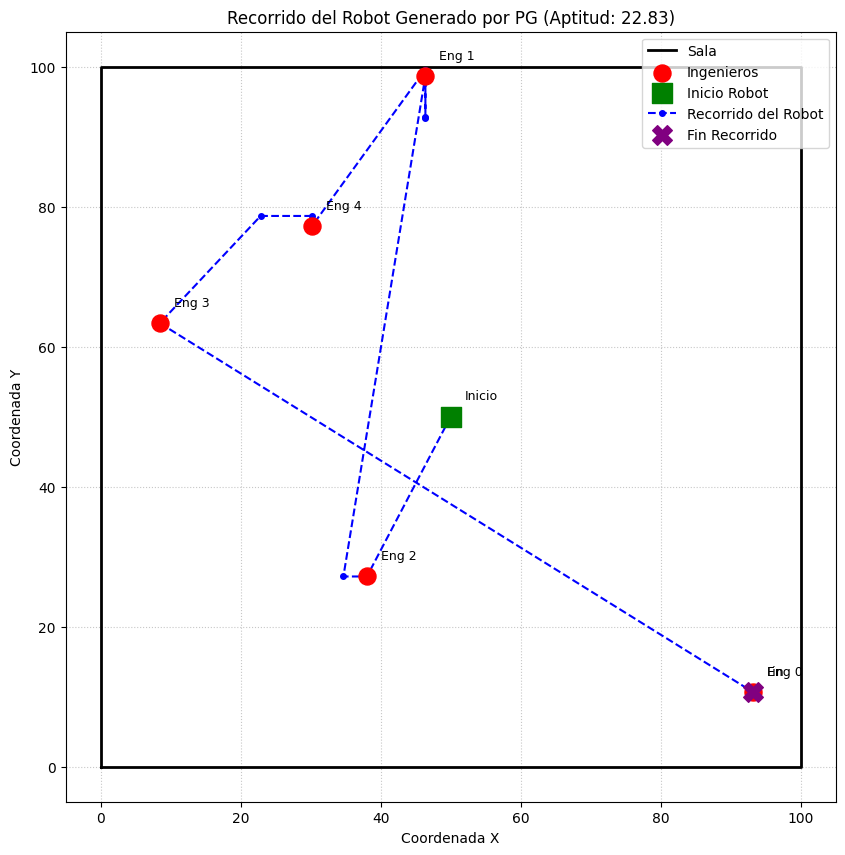

In [5]:
#Francisco Josse Rojas Rojas
#Yeira lISETH Rodriguez Rodriguez

import random
import math
import operator
import matplotlib.pyplot as plt # Importar matplotlib

# --- 1. Configuración del Entorno y Problema ---

# Dimensiones de la sala (cuadrada)
ROOM_SIZE = 100

# Número de ingenieros
NUM_ENGINEERS = 5

# Posición inicial del robot
ROBOT_START_POS = [ROOM_SIZE / 2, ROOM_SIZE / 2]

# Puntos por galleta entregada
POINTS_PER_COOKIE = 10

# Penalización por unidad de distancia recorrida
DIST_PENALTY_FACTOR = 0.1

# Penalización por galleta no entregada
NO_COOKIE_PENALTY = 50

# Generaciones para el algoritmo genético
NUM_GENERATIONS = 50

# Tamaño de la población
POPULATION_SIZE = 100

# Probabilidad de cruce
CXPB = 0.7

# Probabilidad de mutación
MUTPB = 0.2

# --- 2. Definición de Terminales y Funciones (Árboles de PG) ---

class RobotState:
    def __init__(self, engineers_coords, robot_pos, delivered_cookies):
        self.robot_x = robot_pos[0]
        self.robot_y = robot_pos[1]
        self.engineers = engineers_coords # Lista de [x, y]
        self.delivered = delivered_cookies # Lista de booleanos, True si se entregó
        self.total_distance = 0
        self.path_history = [(robot_pos[0], robot_pos[1])] # Historial de posiciones para visualización

    def get_pos(self):
        return self.robot_x, self.robot_y

    def get_engineer_pos(self, engineer_id):
        return self.engineers[engineer_id]

    def set_delivered(self, engineer_id):
        if not self.delivered[engineer_id]:
            self.delivered[engineer_id] = True
            return True # Cookie delivered successfully
        return False # Cookie already delivered

    def move_to(self, target_x, target_y):
        dist = math.sqrt((target_x - self.robot_x)**2 + (target_y - self.robot_y)**2)
        self.robot_x = target_x
        self.robot_y = target_y
        self.total_distance += dist
        self.path_history.append((self.robot_x, self.robot_y)) # Registrar posición

# Funciones primitivas que el robot puede ejecutar
def move_x_func(state, steps):
    """Mueve el robot en el eje X."""
    new_x = max(0, min(ROOM_SIZE, state.robot_x + steps))
    state.move_to(new_x, state.robot_y)
    return state

def move_y_func(state, steps):
    """Mueve el robot en el eje Y."""
    new_y = max(0, min(ROOM_SIZE, state.robot_y + steps))
    state.move_to(state.robot_x, new_y)
    return state

def go_to_engineer_func(state, engineer_id):
    """Mueve el robot a la posición de un ingeniero."""
    engineer_x, engineer_y = state.get_engineer_pos(engineer_id)
    state.move_to(engineer_x, engineer_y)
    return state

def deliver_cookie_func(state, engineer_id):
    """Entrega una galleta al ingeniero y actualiza el estado."""
    # Para que el robot se "mueva" para entregar la galleta,
    # podríamos añadir un movimiento implícito si no está en la posición del ingeniero.
    # Por ahora, solo actualiza el estado de entrega.
    state.set_delivered(engineer_id)
    return state

# --- 3. Generación de Población Inicial (Programas Aleatorios) ---

def generate_random_program():
    """Genera un programa (lista de instrucciones) aleatorio."""
    program = []
    available_actions = [
        ("go_to_engineer", random.randint(0, NUM_ENGINEERS - 1)),
        ("deliver_cookie", random.randint(0, NUM_ENGINEERS - 1)),
        ("move_x", random.uniform(-10, 10)),
        ("move_y", random.uniform(-10, 10))
    ]
    for _ in range(random.randint(5, 15)): # Longitud aleatoria del programa
        program.append(random.choice(available_actions))
    return program

def create_initial_population(size):
    return [generate_random_program() for _ in range(size)]

# --- 4. Función de Aptitud ---

def evaluate_program(program, engineers_coords):
    """Evalúa un programa (secuencia de acciones) y calcula su aptitud."""
    initial_delivered_state = [False] * NUM_ENGINEERS
    robot_state = RobotState(engineers_coords, list(ROBOT_START_POS), initial_delivered_state)

    score = 0

    # Ejecutar el programa paso a paso
    for action in program:
        func_name = action[0]
        args = action[1:]

        if func_name == "go_to_engineer":
            go_to_engineer_func(robot_state, args[0])
        elif func_name == "deliver_cookie":
            # Para que la entrega de galletas sea más realista,
            # podríamos forzar un movimiento al ingeniero antes de entregar.
            # Esto es clave para que el robot realmente se mueva.
            # Aquí, si solo se llama 'deliver_cookie', el robot no se mueve a menos que
            # se haya llamado previamente 'go_to_engineer' o 'move_x/y'.

            # --- MODIFICACIÓN IMPORTANTE PARA QUE EL ROBOT SE MUEVA ANTES DE ENTREGAR ---
            # Si la acción es 'deliver_cookie', forzamos al robot a ir a la posición del ingeniero
            # antes de intentar entregar la galleta. Esto evitará una aptitud alta por "teletransportarse".
            engineer_id_to_deliver = args[0]
            engineer_x, engineer_y = robot_state.get_engineer_pos(engineer_id_to_deliver)

            # Mueve el robot a la posición del ingeniero antes de entregar
            robot_state.move_to(engineer_x, engineer_y)
            # -----------------------------------------------------------------------------

            if robot_state.set_delivered(engineer_id_to_deliver): # Ahora entregamos en la posición del ingeniero
                score += POINTS_PER_COOKIE
        elif func_name == "move_x":
            move_x_func(robot_state, args[0])
        elif func_name == "move_y":
            move_y_func(robot_state, args[0])

    # Calcular penalizaciones
    score -= robot_state.total_distance * DIST_PENALTY_FACTOR

    cookies_not_delivered = robot_state.delivered.count(False)
    score -= cookies_not_delivered * NO_COOKIE_PENALTY

    # Devolvemos el estado del robot también para la visualización
    return score, robot_state

# --- 5. Operadores Genéticos (Esquema simplificado) ---

def crossover(parent1, parent2):
    """Realiza un cruce simple (intercambio de segmentos)."""
    if len(parent1) < 2 or len(parent2) < 2:
        return parent1, parent2

    cx_point1 = random.randint(1, len(parent1) - 1)
    cx_point2 = random.randint(1, len(parent2) - 1)

    child1 = parent1[:cx_point1] + parent2[cx_point2:]
    child2 = parent2[:cx_point2] + parent1[cx_point1:]

    return child1, child2

def mutate(individual):
    """Realiza una mutación simple (cambio aleatorio de una acción)."""
    if not individual:
        return individual,

    idx = random.randint(0, len(individual) - 1)

    available_actions_for_mutation = [
        ("go_to_engineer", random.randint(0, NUM_ENGINEERS - 1)),
        ("deliver_cookie", random.randint(0, NUM_ENGINEERS - 1)),
        ("move_x", random.uniform(-10, 10)),
        ("move_y", random.uniform(-10, 10))
    ]
    individual[idx] = random.choice(available_actions_for_mutation)

    return individual,

# --- 6. Algoritmo Principal de Programación Genética ---

def genetic_programming_robot_path():
    # 1. Posiciones aleatorias de los ingenieros
    engineers_positions = []
    for _ in range(NUM_ENGINEERS):
        engineers_positions.append([random.uniform(0, ROOM_SIZE), random.uniform(0, ROOM_SIZE)])

    print(f"Posiciones de los ingenieros: {engineers_positions}")

    # 2. Crear población inicial
    population = create_initial_population(POPULATION_SIZE)

    # Elitismo: Mantener el mejor individuo de cada generación
    hall_of_fame = []

    for gen in range(NUM_GENERATIONS):
        print(f"\n--- Generación {gen + 1} ---")

        # Evaluar la aptitud de cada individuo
        # Ahora evaluate_program devuelve (score, robot_state)
        evaluated_population = [(evaluate_program(ind, engineers_positions), ind) for ind in population]

        # Ordenar por aptitud (el mejor es el que tiene mayor aptitud)
        # Acceder a la aptitud: `evaluated_program[0]`
        fitnesses = sorted(evaluated_population, key=lambda x: x[0][0], reverse=True)

        # Guardar el mejor individuo de la generación
        current_best_individual = fitnesses[0][1]
        current_best_fitness = fitnesses[0][0][0]
        current_best_robot_state = fitnesses[0][0][1] # Guardar el estado del robot para visualización

        hall_of_fame.append((current_best_fitness, current_best_individual, current_best_robot_state.path_history))

        print(f"Mejor aptitud de la generación: {current_best_fitness}")
        # print(f"Mejor programa de la generación: {current_best_individual}")

        # Selección de padres
        parents = [ind for (fitness_score, robot_state), ind in fitnesses[:POPULATION_SIZE // 2]]

        next_population = []

        # Reproducción (cruce y mutación)
        while len(next_population) < POPULATION_SIZE:
            p1 = random.choice(parents)
            p2 = random.choice(parents)

            child1, child2 = p1, p2

            if random.random() < CXPB:
                child1, child2 = crossover(p1, p2)

            if random.random() < MUTPB:
                child1, = mutate(child1)
            if random.random() < MUTPB:
                child2, = mutate(child2)

            next_population.append(child1)
            if len(next_population) < POPULATION_SIZE:
                next_population.append(child2)

        population = next_population

    # Encontrar el mejor individuo de todas las generaciones
    hall_of_fame.sort(key=lambda x: x[0], reverse=True)
    overall_best_fitness, overall_best_program, overall_best_path_history = hall_of_fame[0]

    print("\n--- Resultados Finales ---")
    print(f"Mejor aptitud encontrada: {overall_best_fitness}")
    print(f"Programa de recorrido óptimo: {overall_best_program}")

    # Simular la ejecución del programa óptimo para obtener el estado final detallado
    final_score, final_robot_state = evaluate_program(overall_best_program, engineers_positions)

    print(f"\nEstado final del robot después de ejecutar el programa óptimo:")
    print(f"Posición final del robot: ({final_robot_state.robot_x:.2f}, {final_robot_state.robot_y:.2f})")
    print(f"Galletas entregadas: {final_robot_state.delivered.count(True)} de {NUM_ENGINEERS}")
    print(f"Distancia total recorrida: {final_robot_state.total_distance:.2f}")

    # --- Visualización del recorrido ---
    plt.figure(figsize=(10, 10))

    # Dibujar la sala
    plt.plot([0, ROOM_SIZE, ROOM_SIZE, 0, 0], [0, 0, ROOM_SIZE, ROOM_SIZE, 0], 'k-', linewidth=2, label='Sala')

    # Dibujar ingenieros
    engineer_x = [p[0] for p in engineers_positions]
    engineer_y = [p[1] for p in engineers_positions]
    plt.scatter(engineer_x, engineer_y, color='red', marker='o', s=150, label='Ingenieros', zorder=5)
    for i, (x, y) in enumerate(engineers_positions):
        plt.text(x + 2, y + 2, f'Eng {i}', fontsize=9, ha='left', va='bottom')

    # Dibujar el inicio del robot
    plt.scatter(ROBOT_START_POS[0], ROBOT_START_POS[1], color='green', marker='s', s=200, label='Inicio Robot', zorder=5)
    plt.text(ROBOT_START_POS[0] + 2, ROBOT_START_POS[1] + 2, 'Inicio', fontsize=9, ha='left', va='bottom')

    # Dibujar el recorrido del robot
    path_x = [p[0] for p in final_robot_state.path_history]
    path_y = [p[1] for p in final_robot_state.path_history]
    plt.plot(path_x, path_y, color='blue', linestyle='--', linewidth=1.5, marker='.', markersize=8, label='Recorrido del Robot')

    # Marcar el final del recorrido del robot
    if path_x and path_y:
        plt.scatter(path_x[-1], path_y[-1], color='purple', marker='X', s=200, label='Fin Recorrido', zorder=5)
        plt.text(path_x[-1] + 2, path_y[-1] + 2, 'Fin', fontsize=9, ha='left', va='bottom')


    plt.xlim(-5, ROOM_SIZE + 5)
    plt.ylim(-5, ROOM_SIZE + 5)
    plt.title(f'Recorrido del Robot Generado por PG (Aptitud: {overall_best_fitness:.2f})')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.legend(loc='upper right')
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.gca().set_aspect('equal', adjustable='box') # Para que la sala sea cuadrada
    plt.show()

# --- Ejecución ---
if __name__ == "__main__":
    genetic_programming_robot_path()